In [1]:
from tensorflow.keras.preprocessing import image
import numpy as np
from tensorflow.keras.models import load_model
model = load_model('best_model2.h5')
img_path = 'img/rabbit.jpg'
img = image.load_img(img_path, target_size = (224,224))
img_array = image.img_to_array(img)
img_array = np.expand_dims(img_array, axis = 0)
img_array /= 255.0  
prediction = model.predict(img_array)
if prediction[0] > 0.5:
    print("預測為：Dog", f"信心值：{prediction[0][0]:.4f}")
else:
    print("預測為：Cat", f"信心值：{1 - prediction[0][0]:.4f}")

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 828ms/step
預測為：Dog 信心值：0.7845


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 416ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 219ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 216ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 230ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 326ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 252ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 250ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 242ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 231ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 246ms/step


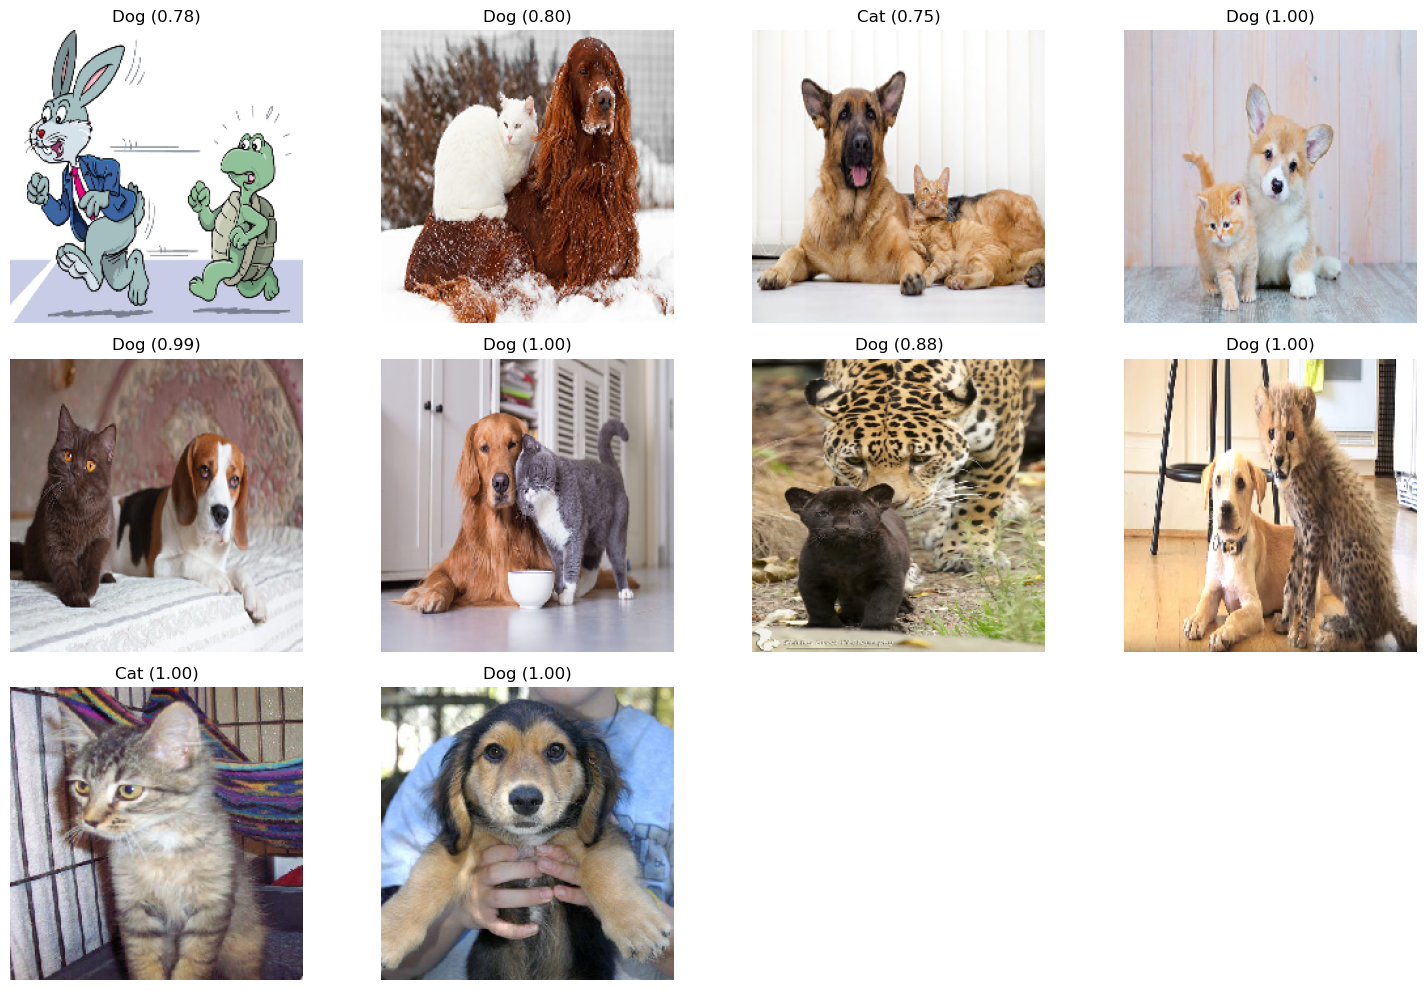

In [2]:
import os
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing import image
from tensorflow.keras.models import load_model
model = load_model('best_model2.h5')
IMG_DIR = 'img'
IMG_SIZE = (224,224)
MAX_SHOW = 12
img_files = [f for f in os.listdir(IMG_DIR) if f.lower().endswith(('.jpg','.png','.jpeg'))]
plt.figure(figsize = (15,10))
for i, file_name in enumerate(img_files[:MAX_SHOW]):
    img_path = os.path.join(IMG_DIR, file_name)
    img = image.load_img(img_path, target_size = IMG_SIZE)
    img_array = image.img_to_array(img)
    img_array = np.expand_dims(img_array, axis = 0)
    img_array /= 255.0
    pred = model.predict(img_array)[0][0]
    label = "Dog" if pred > 0.5 else "Cat"
    confidence = pred if pred > 0.5 else 1 - pred
    plt.subplot(3, 4, i + 1)
    plt.imshow(img)
    plt.title(f"{label} ({confidence:.2f})")
    plt.axis('off')
plt.tight_layout()
plt.show()